# Comparison of all regression model

Regression is a type of supervised learning in machine learning, where the objective is to learn a relationship between input variables (also known as independent variables) and a continuous output variable (also known as dependent variable).

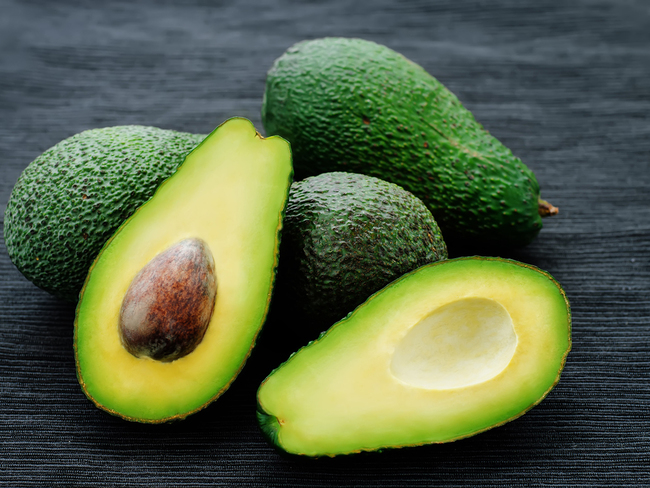

In [1]:
#Display image using python

from IPython.display import Image
url = 'https://img.etimg.com/thumb/msid-71806721,width-650,imgsize-807917,,resizemode-4,quality-100/avocados.jpg'
Image(url,height=300,width=400)

In [2]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing Dataset

df=pd.read_csv(r"C:\Users\subasish\Untitled Folder\REGRESSION\COMPLETE REGRESSION WITH BUSINESS CASE STUDY\avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [6]:
df.shape

(18249, 14)

<AxesSubplot: xlabel='AveragePrice', ylabel='Density'>

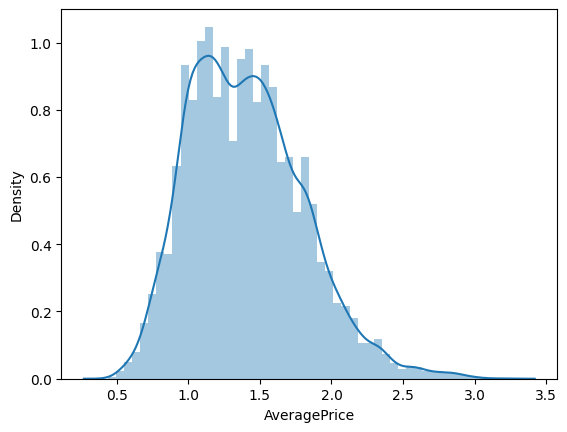

In [7]:
sns.distplot(df['AveragePrice'])

<AxesSubplot: xlabel='year', ylabel='count'>

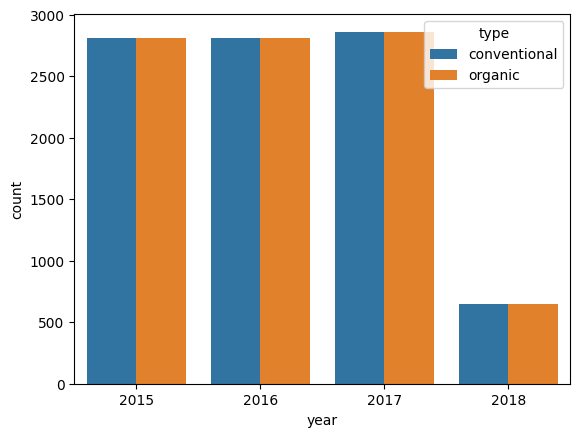

In [8]:
sns.countplot(x='year', data=df,hue='type')

In [9]:
df['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

<AxesSubplot: xlabel='AveragePrice', ylabel='type'>

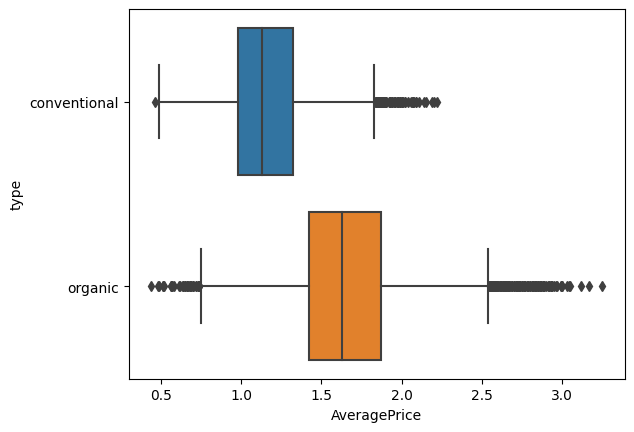

In [10]:
sns.boxplot(x=df['AveragePrice'], y=df['type'])

Here Organic avocados are more expensive

<AxesSubplot: xlabel='year', ylabel='AveragePrice'>

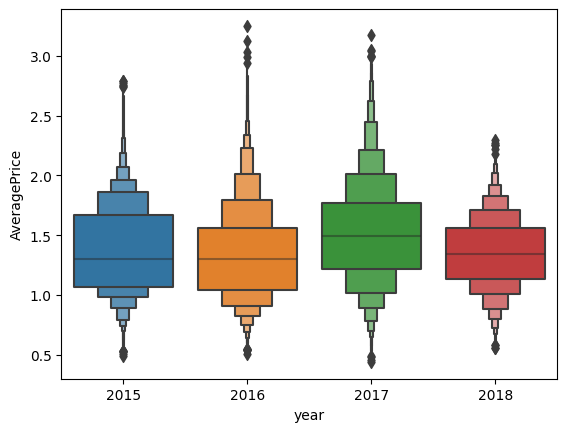

In [11]:
df.year=df.year.apply(str)  #Here convert int datatypes to str type
sns.boxenplot(x=df['year'], y=df['AveragePrice'])

# Dealing with categorical features.

In [12]:
#Convert categorical to numerical feature
#conventional=0    and       organic=1

df['type']= df['type'].map({'conventional':0 ,'organic':1})

# Extrcting month from date column.

df.Date = df.Date.apply(pd.to_datetime)
df['Month']=df['Date'].apply(lambda x:x.month)
df.drop('Date',axis=1,inplace=True)
df.Month = df.Month.map({1:'JAN',2:'FEB',3:'MARCH',4:'APRIL',5:'MAY',6:'JUNE',7:'JULY',8:'AUG',9:'SEPT',10:'OCT',11:'NOV',12:'DEC'})

In [13]:
df.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany,DEC
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany,DEC
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany,DEC
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany,DEC
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany,NOV


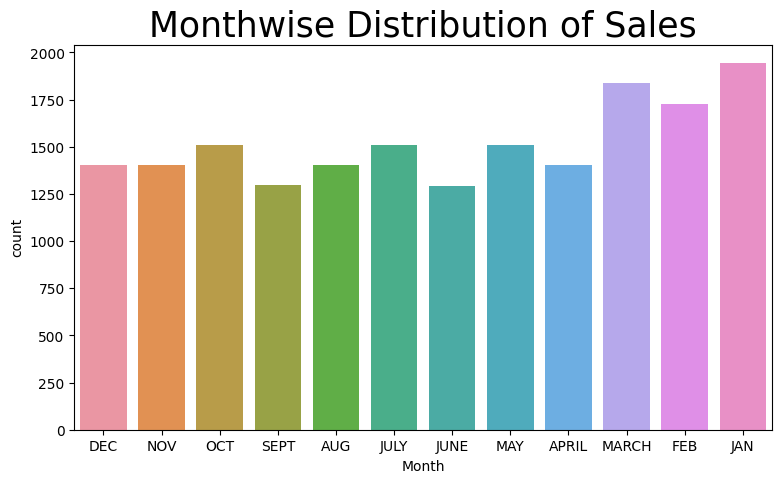

In [14]:
plt.figure(figsize=(9,5))
sns.countplot(x=df['Month'])
plt.title('Monthwise Distribution of Sales',fontdict={'fontsize':25});

# Preparing data for ML models

In [15]:
# Creating dummy variables
dummies = pd.get_dummies(df[['year','region','Month']],drop_first=True)
df_dummies = pd.concat([df[['Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type']],dummies],axis=1)
target = df['AveragePrice']

# Splitting data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_dummies,target,test_size=0.30)

# Standardizing the data
cols_to_std = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags','Large Bags', 'XLarge Bags']
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train[cols_to_std])
X_train[cols_to_std] = scaler.transform(X_train[cols_to_std])
X_test[cols_to_std] = scaler.transform(X_test[cols_to_std])

In [16]:
#importing ML models from scikit-learn

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [17]:
#to save time, all models can be applied once using for loop
regressors = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'Support Vector Machines' : SVR(gamma=1),
    'K-nearest Neighbors' : KNeighborsRegressor(n_neighbors=1),
    'XGBoost' : XGBRegressor()
}
results=pd.DataFrame(columns=['MAE','MSE','R2-score'])
for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.round(r2_score(y_test,pred),3)
                         ]

In [18]:
results

,MAE,MSE,R2-score
Linear Regression,0.181,0.058,0.651
Decision Tree,0.128,0.038,0.768
Random Forest,0.095,0.019,0.887
Support Vector Machines,0.117,0.028,0.832
K-nearest Neighbors,0.100,0.024,0.855
XGBoost,0.095,0.017,0.896


# Deep Neural Network 

In [19]:
# Splitting train set into training and validation sets.
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.20)

#importing tensorflow libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

#creating model
model = Sequential()
model.add(Dense(76,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.5))
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.5))
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.5))
model.add(Dense(1))

model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=10)

In [20]:

model.fit(x=X_train.values,y=y_train.values,
          validation_data=(X_val.values,y_val.values),
          batch_size=100,epochs=25,callbacks=[early_stop])

Epoch 1/25
103/103 [==============================] - 2s 12ms/step - loss: 0.2730 - val_loss: 0.0726
Epoch 2/25
103/103 [==============================] - 1s 7ms/step - loss: 0.1061 - val_loss: 0.0661
Epoch 3/25
103/103 [==============================] - 1s 6ms/step - loss: 0.0908 - val_loss: 0.0522
Epoch 4/25
103/103 [==============================] - 1s 7ms/step - loss: 0.0800 - val_loss: 0.0497
Epoch 5/25
103/103 [==============================] - 1s 7ms/step - loss: 0.0717 - val_loss: 0.0449
Epoch 6/25
103/103 [==============================] - 1s 6ms/step - loss: 0.0645 - val_loss: 0.0452
Epoch 7/25
103/103 [==============================] - 1s 7ms/step - loss: 0.0605 - val_loss: 0.0435
Epoch 8/25
103/103 [==============================] - 1s 7ms/step - loss: 0.0573 - val_loss: 0.0386
Epoch 9/25
103/103 [==============================] - 1s 7ms/step - loss: 0.0541 - val_loss: 0.0365
Epoch 10/25
103/103 [==============================] - 1s 7ms/step - loss: 0.0524 - val_loss: 0.033

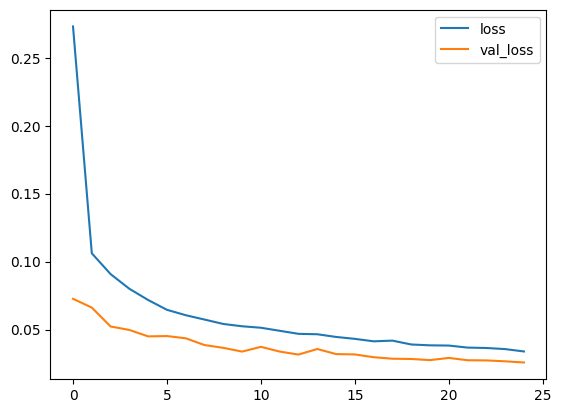

In [21]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot();

In [22]:
dnn_pred = model.predict(X_test)

172/172 [==============================] - 1s 2ms/step


In [23]:
results.loc['Deep Neural Network']=[mean_absolute_error(y_test,dnn_pred).round(3),mean_squared_error(y_test,dnn_pred).round(3),
                                    r2_score(y_test,dnn_pred).round(3)]
results

,MAE,MSE,R2-score
Linear Regression,0.181,0.058,0.651
Decision Tree,0.128,0.038,0.768
Random Forest,0.095,0.019,0.887
Support Vector Machines,0.117,0.028,0.832
K-nearest Neighbors,0.100,0.024,0.855
XGBoost,0.095,0.017,0.896
Deep Neural Network,0.115,0.026,0.842


In [24]:
f"10% of mean of target variable is {np.round(0.1 * df.AveragePrice.mean(),3)}"

'10% of mean of target variable is 0.141'

In [25]:
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Greens',subset=['R2-score'])

,MAE,MSE,R2-score
XGBoost,0.095000,0.017000,0.896000
Random Forest,0.095000,0.019000,0.887000
K-nearest Neighbors,0.100000,0.024000,0.855000
Deep Neural Network,0.115000,0.026000,0.842000
Support Vector Machines,0.117000,0.028000,0.832000
Decision Tree,0.128000,0.038000,0.768000
Linear Regression,0.181000,0.058000,0.651000


In [26]:
dnn_pred

array([[1.0044236],
       [1.8616037],
       [1.3507905],
       ...,
       [1.0129377],
       [1.8749846],
       [1.512993 ]], dtype=float32)